In [3]:
!pip install keras
!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\amara\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-c

ModuleNotFoundError: No module named 'tensorflow.python'

In [37]:
# 1. Baca Data
data = pd.read_csv("/content/Hasil_Labeling_apple.csv")

In [38]:
# 2. Pisah Fitur dan Label
X = data['comments']
y = data['sentiment']

In [39]:
#3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# 4. Tokenisasi dan Padding
max_words = 10000
maxlen = 100

X_train = X_train.astype(str)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)

X_test = X_test.astype(str)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [41]:
# 5. Bikin Model CNN
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [42]:
# 6. Kompilasi dan Pelatihan Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
16/16 [==============================] - 5s 181ms/step - loss: 0.2908 - accuracy: 0.4459 - val_loss: -0.4493 - val_accuracy: 0.4896
Epoch 2/20
16/16 [==============================] - 2s 134ms/step - loss: -1.3229 - accuracy: 0.4647 - val_loss: -2.7495 - val_accuracy: 0.4896
Epoch 3/20
16/16 [==============================] - 2s 156ms/step - loss: -4.4361 - accuracy: 0.4647 - val_loss: -9.0931 - val_accuracy: 0.4896
Epoch 4/20
16/16 [==============================] - 1s 68ms/step - loss: -15.6496 - accuracy: 0.4647 - val_loss: -31.1689 - val_accuracy: 0.4896
Epoch 5/20
16/16 [==============================] - 1s 68ms/step - loss: -46.8078 - accuracy: 0.4647 - val_loss: -85.1993 - val_accuracy: 0.4896
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: -106.5705 - accuracy: 0.4647 - val_loss: -164.1561 - val_accuracy: 0.4896
Epoch 7/20
16/16 [==============================] - 1s 68ms/step - loss: -226.7568 - accuracy: 0.4647 - val_loss: -337.9095 - val_ac

In [43]:
# 7. Evaluasi Model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 17ms/step - loss: -42514.0625 - accuracy: 0.4751
Test Accuracy: 0.47508305311203003


In [44]:
# 8. Prediksi sentimen dari data komentar
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)  # Menggunakan threshold 0.5 untuk memprediksi kelas

10/10 [==============================] - 0s 16ms/step


In [45]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[  0  55   0   0]
 [  0 143   0   0]
 [  0  99   0   0]
 [  0   4   0   0]]


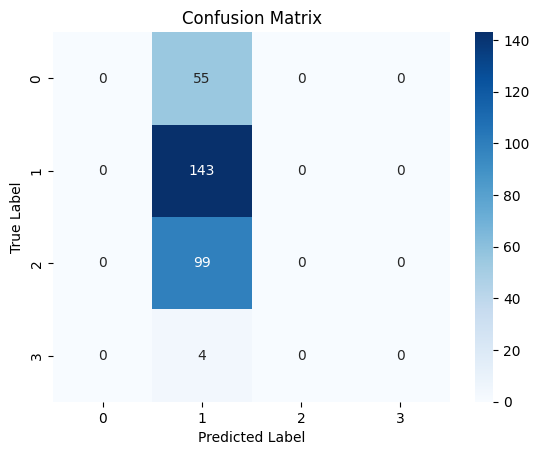

In [46]:
# 10. Visualisasi Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# 11. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        55
           1       0.48      1.00      0.64       143
           2       1.00      0.00      0.00        99
           3       1.00      0.00      0.00         4

    accuracy                           0.48       301
   macro avg       0.87      0.25      0.16       301
weighted avg       0.75      0.48      0.31       301



In [48]:
# 10. K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(X_train_pad, y_train):

    X_train_fold, X_val_fold = X_train_pad[train_idx], X_train_pad[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop])

    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)


print('Mean Cross-validation Accuracy:', np.mean(cv_scores))
print('Standard Deviation of Cross-validation Accuracy:', np.std(cv_scores))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: -58824.0117 - accuracy: 0.4699 - val_loss: -63879.1133 - val_accuracy: 0.4689
Epoch 2/20
16/16 [==============================] - 1s 68ms/step - loss: -67176.3984 - accuracy: 0.4699 - val_loss: -70530.8828 - val_accuracy: 0.4689
Epoch 3/20
16/16 [==============================] - 1s 69ms/step - loss: -72623.9531 - accuracy: 0.4699 - val_loss: -77615.5781 - val_accuracy: 0.4689
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: -79573.5938 - accuracy: 0.4699 - val_loss: -84636.3438 - val_accuracy: 0.4689
Epoch 5/20
16/16 [==============================] - 1s 67ms/step - loss: -87483.3125 - accuracy: 0.4699 - val_loss: -93010.2891 - val_accuracy: 0.4689
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: -93287.4141 - accuracy: 0.4699 - val_loss: -102359.5078 - val_accuracy: 0.4689
Epoch 7/20
16/16 [==============================] - 1s 74ms/step - loss: -104533.8750 - accur